<a href="https://colab.research.google.com/github/hrishabhsrivastava/GRI2022/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and predicting the photometric redshift using the Keras Neural Network

## Loading the dataset

### Photometric Data

In [ ]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
data1 = fits.open('sample_data/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1-1_photometry-cat.fits')

In [ ]:
pd.DataFrame(data1[1].data)

,ID,IAU_Name,RA,DEC,FLAGS,CLASS_STAR,Xray,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,...,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,MOIRCS_K_FLUXERR,CFHT_Ks_FLUXERR,IRAC_CH1_SCANDELS_FLUXERR,IRAC_CH2_SCANDELS_FLUXERR,IRAC_CH3_FLUXERR,IRAC_CH4_FLUXERR
0,1,CANDELS_GDN_J123636.5+620530.4,189.152162,62.091778,0,0,-99.0,0.02614,-99.00000,-99.00000,...,-99.00000,0.03355,-99.00000,0.37967,-99.00000,-99.00000,-99.00000,-99.00000,-99.00000,-99.00000
1,2,CANDELS_GDN_J123635.7+620531.3,189.148834,62.092027,0,0,-99.0,0.02920,0.00225,-99.00000,...,-99.00000,0.15218,-99.00000,0.38833,-99.00000,-99.00000,0.13861,0.13546,-99.00000,-99.00000
2,3,CANDELS_GDN_J123636.3+620531.7,189.151338,62.092132,0,0,-99.0,0.01054,0.01018,0.01698,...,0.03179,-99.00000,-99.00000,0.04517,-99.00000,-99.00000,0.14661,0.14498,1.01669,1.55440
3,4,CANDELS_GDN_J123635.9+620531.6,189.149606,62.092117,0,0,-99.0,-99.00000,-99.00000,-99.00000,...,0.12399,-99.00000,-99.00000,0.37000,-99.00000,-99.00000,0.13485,0.13161,-99.00000,1.36652
4,5,CANDELS_GDN_J123635.5+620533.0,189.148085,62.092497,0,0,-99.0,0.03846,0.04056,0.03149,...,0.08044,0.04452,-99.00000,0.40754,-99.00000,0.10038,0.12735,0.12540,0.96478,1.29261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35440,35447,CANDELS_GDN_J123719.4+622023.8,189.330667,62.339936,0,0,-99.0,0.13152,0.11236,0.03644,...,0.02292,0.02831,0.05228,0.02963,0.03641,0.08215,0.12129,-99.00000,-99.00000,-99.00000
35441,35448,CANDELS_GDN_J123658.4+622055.9,189.243205,62.348861,0,0,-99.0,0.05947,0.03737,0.03453,...,0.01592,0.01367,-99.00000,0.01529,-99.00000,0.07782,-99.00000,-99.00000,-99.00000,-99.00000
35442,35449,CANDELS_GDN_J123728.5+622034.4,189.368663,62.342882,0,0,-99.0,0.06943,0.02436,0.06862,...,0.01733,0.02205,0.02330,0.02252,0.03552,0.08086,0.10195,0.08212,-99.00000,-99.00000
35443,35450,CANDELS_GDN_J123643.2+621914.6,189.179879,62.320735,0,0,-99.0,0.00139,-99.00000,0.01849,...,0.00832,0.00665,0.01249,0.01384,-99.00000,0.07326,-99.00000,-99.00000,0.58542,-99.00000


In [ ]:
arr1 = pd.DataFrame(data1[1].data).to_numpy()

### Redshift Data

In [ ]:
data2 = fits.open('sample_data/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_redshift-cat.fits')

In [ ]:
pd.DataFrame(data2[1].data)

,ID,zspec,zspecflag,zref,ztier,ztier_err,ztier_class,zbest
0,1,0.0000,0.0,---,2.335,3.229,3,2.335
1,2,0.0000,0.0,---,7.950,1.460,3,7.950
2,3,0.0000,0.0,---,8.837,0.634,3,8.837
3,4,0.0000,0.0,---,8.002,2.099,3,8.002
4,5,0.0000,0.0,---,0.255,0.025,3,0.255
...,...,...,...,...,...,...,...,...
35440,35447,0.9372,3.0,Cooper11,1.026,0.149,2,1.026
35441,35448,0.0000,0.0,---,1.626,0.334,3,1.626
35442,35449,0.0000,0.0,---,2.649,0.042,2,2.649
35443,35450,0.0000,0.0,---,2.920,0.624,3,2.920


In [ ]:
arr2 = pd.DataFrame(data2[1].data).to_numpy()

### Merging the dataset

In [ ]:
df = pd.merge(pd.DataFrame(data1[1].data),pd.DataFrame(data2[1].data),on='ID')

In [ ]:
arrfin = df.to_numpy()

### Data Cleaning

In [ ]:
dfc = df.drop(df[df.zspec == 0.0000].index)

In [ ]:
arrc = dfc.to_numpy()

In [ ]:
arrc2 = np.delete(arrc, np.where(arrc[:,7:23] == -99.0), axis = 0)

In [ ]:
arrc2 = np.delete(arrc2, np.where(arrc2[:,41] > 15.0), axis = 0)

In [ ]:
dfc

,ID,IAU_Name,RA,DEC,FLAGS,CLASS_STAR,Xray,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,...,IRAC_CH2_SCANDELS_FLUXERR,IRAC_CH3_FLUXERR,IRAC_CH4_FLUXERR,zspec,zspecflag,zref,ztier,ztier_err,ztier_class,zbest
37,38,CANDELS_GDN_J123633.7+620551.9,189.140558,62.097762,0,0,-99.0,0.29177,0.27535,0.35835,...,0.12658,0.84589,0.99899,1.3230,1.0,Barger08,1.320,0.002,1,1.3230
46,47,CANDELS_GDN_J123637.3+620556.8,189.155267,62.099114,0,0,-99.0,0.74131,0.55893,1.16242,...,0.11875,0.74099,0.99373,1.1045,4.0,Cooper11,1.875,0.023,2,1.8750
64,65,CANDELS_GDN_J123635.1+620603.0,189.146132,62.100830,0,0,-99.0,1.05877,0.84621,1.15657,...,0.09731,0.68763,0.75207,0.4107,1.0,Barger08,0.414,0.002,1,0.4107
79,80,CANDELS_GDN_J123629.7+620609.5,189.123764,62.102643,0,0,-99.0,0.90107,0.74309,0.75672,...,0.10020,0.68338,-99.00000,0.7481,1.0,Barger08,0.772,0.002,1,0.7481
92,93,CANDELS_GDN_J123639.3+620612.4,189.163854,62.103447,0,0,-99.0,0.84543,0.67995,0.85005,...,0.10738,0.60413,0.78627,1.2900,1.0,Barger08,1.311,0.009,1,1.2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34639,34646,CANDELS_GDN_J123714.8+622014.8,189.311802,62.337436,0,0,-99.0,-99.00000,-99.00000,-99.00000,...,0.07273,-99.00000,-99.00000,0.9370,3.0,DeimosUNPUB,5.449,0.155,2,5.4490
34669,34676,CANDELS_GDN_J123720.3+621957.8,189.334596,62.332717,0,0,-99.0,0.02045,0.01112,0.01941,...,0.07072,-99.00000,-99.00000,2.4900,3.0,Pirkzal13,0.472,0.179,2,0.4720
34969,34976,CANDELS_GDN_J123654.2+622131.1,189.225761,62.358630,0,0,-99.0,0.15861,0.18123,-99.00000,...,0.10010,-99.00000,0.98286,0.7400,1.0,DeimosUNPUB,0.320,0.022,3,0.7400
35265,35272,CANDELS_GDN_J123701.3+622127.9,189.255389,62.357754,0,0,-99.0,0.01066,0.00431,0.00495,...,0.07849,0.73548,0.56103,5.6900,1.0,DeimosUNPUB,5.862,0.182,3,5.6900


## Loading Keras libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#from keras.optimizers import SGD
import tensorflow as tf
from keras.callbacks import History
from sklearn.model_selection import train_test_split
import keras_tuner
from keras_tuner import RandomSearch
import tensorflow

## Splitting the dataset

In [ ]:
pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.8 MB/s 


In [ ]:
X_dat = arrc2[:,7:23]

In [ ]:
Y_dat = arrc2[:,41]

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_dat)

5

## Defining the network

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=np.size(X_dat,1), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softplus'))
model.compile(loss='mse', optimizer='adam',metrics=['mean_squared_error'])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_dat,Y_dat,test_size=0.2,random_state=0)
history1 = []

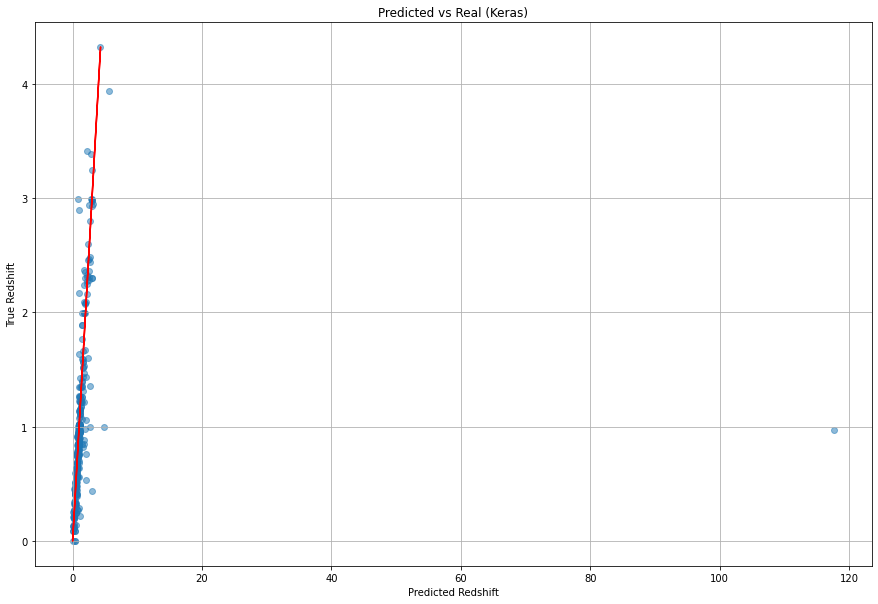

<Figure size 432x432 with 0 Axes>

33.41614693049015


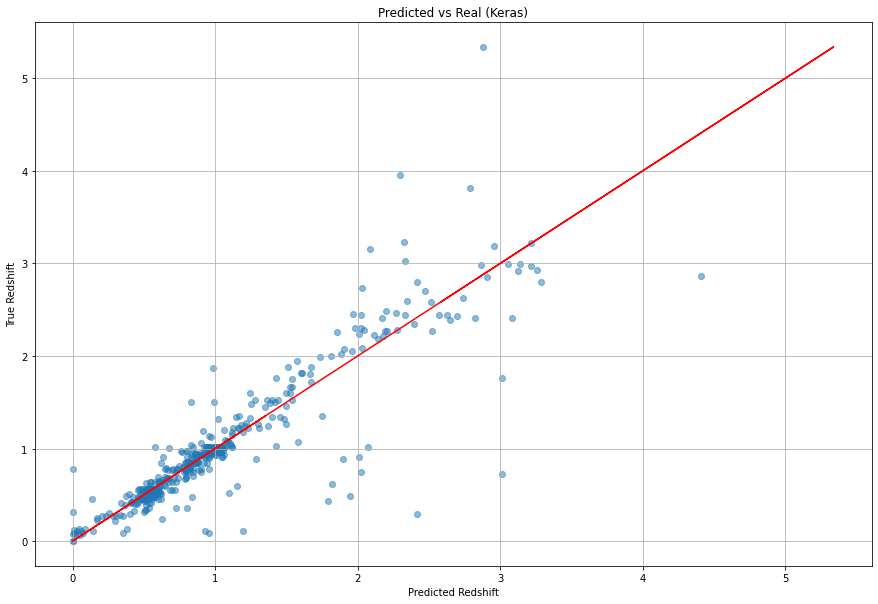

<Figure size 432x432 with 0 Axes>

0.12270840729405667


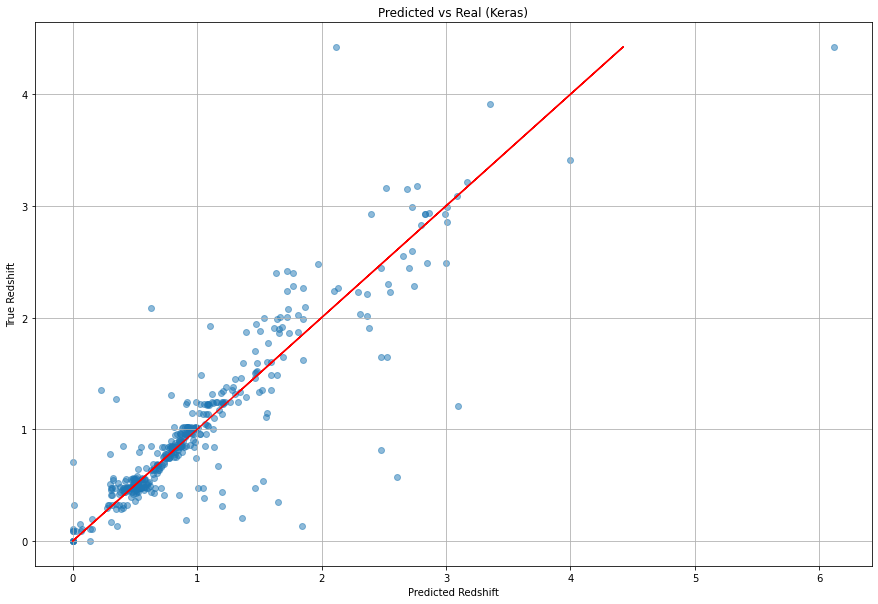

<Figure size 432x432 with 0 Axes>

0.11874624969447836


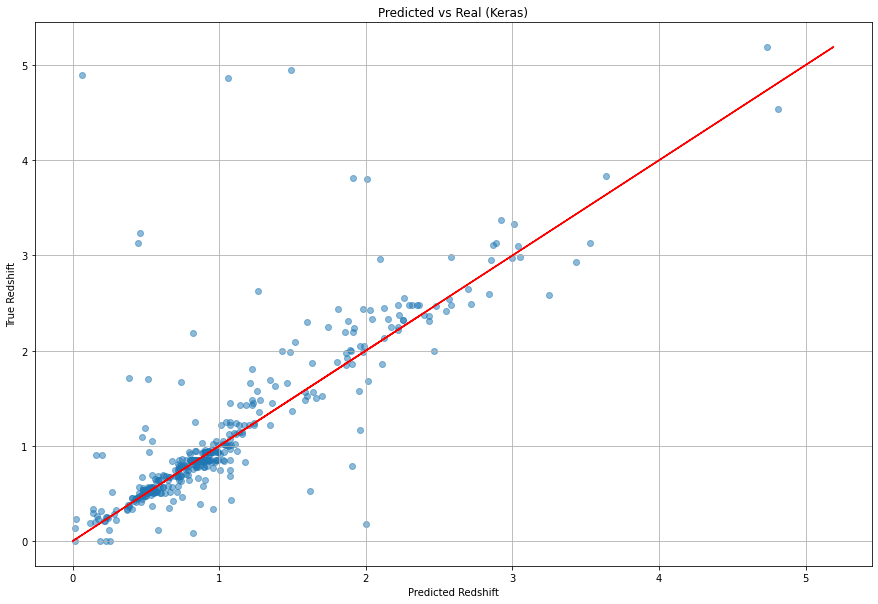

<Figure size 432x432 with 0 Axes>

0.24661710432227685


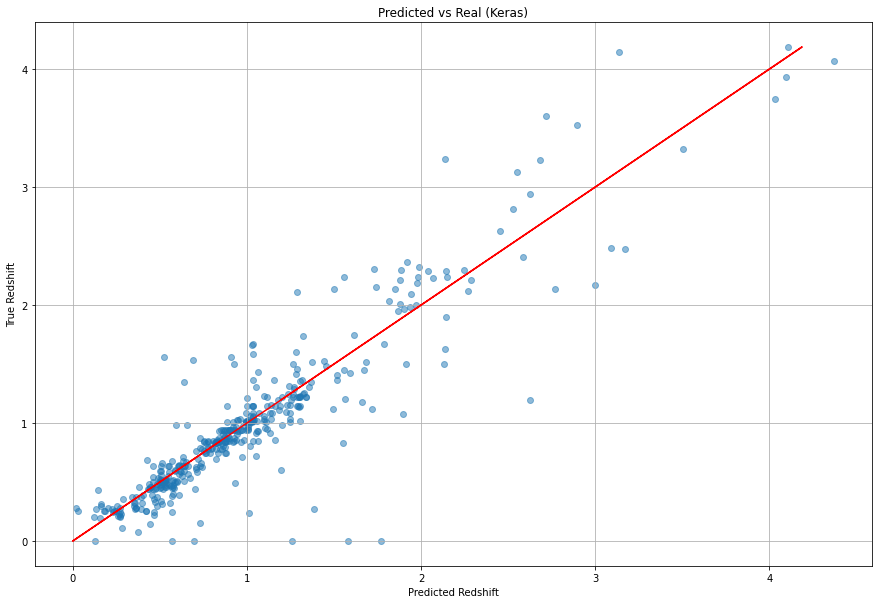

<Figure size 432x432 with 0 Axes>

0.0830059299510133


In [ ]:
history1.clear()
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    ten_X = tf.convert_to_tensor(X_train,dtype=float)
    ten_Y = tf.convert_to_tensor(Y_train,dtype=float)
    history1.append(model.fit(ten_X, ten_Y, batch_size = 10, epochs=500, verbose=0))
    
    arry = Y_test
    ten_testX = tf.convert_to_tensor(X_test,dtype=float)
    arrx = model.predict(ten_testX)
    #print(arrx)
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(arry,arry,'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Keras)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

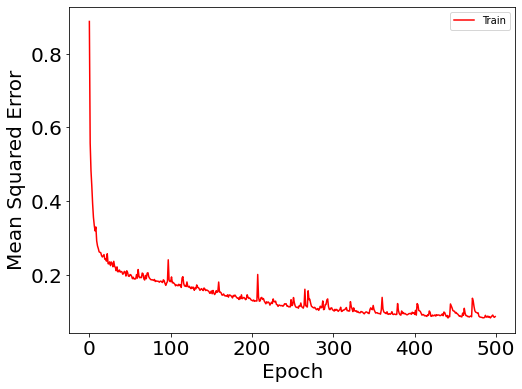

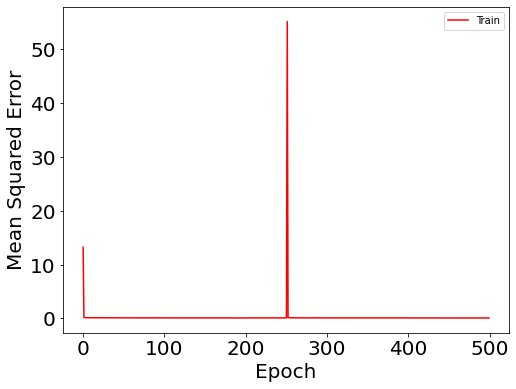

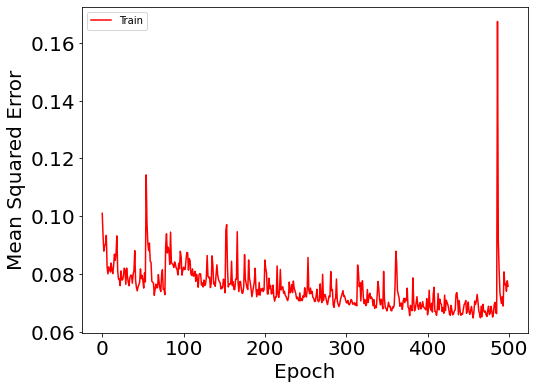

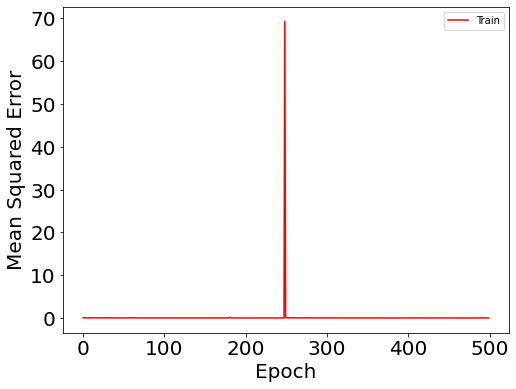

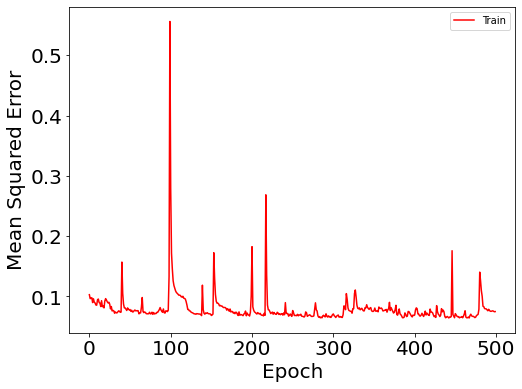

In [ ]:
for i in range(kf.get_n_splits(X_dat)):
  fig, ax = plt.subplots(1, 1, figsize=(8,6))
  ax.plot(history1[i].history['mean_squared_error'], 'r', label='Train')
  #ax.plot(history1[i].history['val_mean_squared_error'], 'b' ,label='Test')
  ax.set_xlabel(r'Epoch', fontsize=20)
  ax.set_ylabel(r'Mean Squared Error', fontsize=20)
  ax.legend()
  ax.tick_params(labelsize=20)

# Hyperparameter Tuning

In [ ]:
def tuned_models(hp):
    model=Sequential()
    model.add(Dense(units=400,activation='relu',input_shape=[X_train.shape[1]]))
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=20,
                                        max_value=400,
                                        step=20),
                               activation='relu'))
        model.add(Dropout(hp.Choice('rate',values=[0.1,0.2,0.4])))

    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error'])
    return model

In [ ]:
tuner_2=keras_tuner.Hyperband(tuned_models,
                     objective='val_mean_squared_error',
                     max_epochs=150,        
                     factor=5,
                     overwrite=True)

In [ ]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 400, 'step': 20, 'sampling': None}
rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.4], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
ten_testX = tf.convert_to_tensor(X_test,dtype=float)
ten_testY = tf.convert_to_tensor(Y_test,dtype=float)
tuner_2.search(ten_X,ten_Y,
             epochs=100,
             validation_data=(ten_testX, ten_testY))

Trial 346 Complete [00h 01m 23s]
val_mean_squared_error: 0.49420779943466187

Best val_mean_squared_error So Far: 0.14393898844718933
Total elapsed time: 01h 41m 15s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_2.get_best_models()[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               6800      
                                                                 
 dense_1 (Dense)             (None, 260)               104260    
                                                                 
 dropout (Dropout)           (None, 260)               0         
                                                                 
 dense_2 (Dense)             (None, 220)               57420     
                                                                 
 dropout_1 (Dropout)         (None, 220)               0         
                                                                 
 dense_3 (Dense)             (None, 140)               30940     
                                                                 
 dropout_2 (Dropout)         (None, 140)               0

In [ ]:
Y_pred = best_model.predict(ten_testX)

In [ ]:
type(Y_pred)

numpy.ndarray

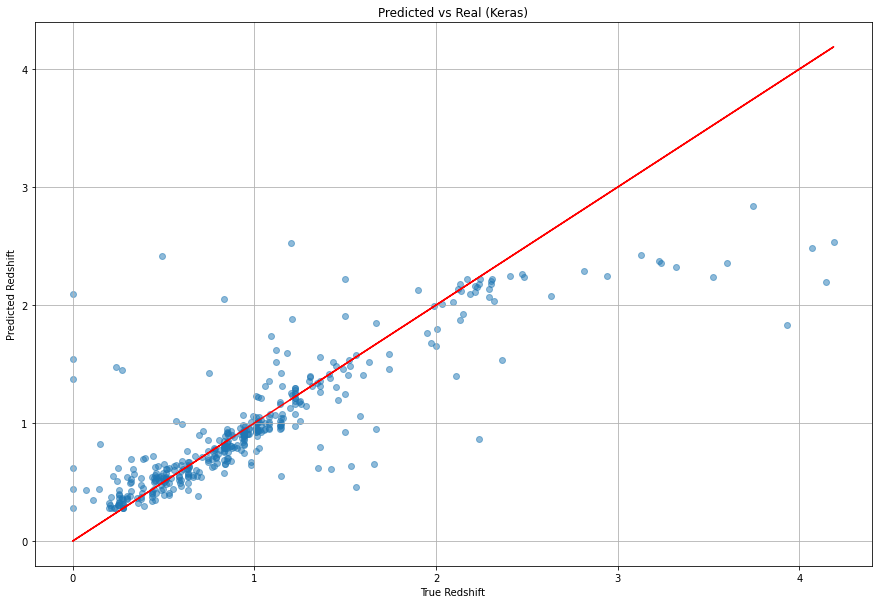

<Figure size 432x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.tight_layout()
plt.scatter(Y_test,Y_pred,alpha=0.5)
plt.plot(Y_test,Y_test,'r-')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Predicted vs Real (Keras)')
plt.grid(visible = True)
fig = plt.figure(figsize=(6, 6))
fig.tight_layout()
plt.show()